In [1]:
your_api_key = "CHNKkTAi3-CIvLMGJZaPIbeXu0j3gxd9IpdfgGPkbBV5"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/87b24589a3b44152b6a85acf9096729f:8ceba6f0-906a-4363-bda9-f5ad62faaca5::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [2]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'CHNKkTAi3-CIvLMGJZaPIbeXu0j3gxd9IpdfgGPkbBV5',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/87b24589a3b44152b6a85acf9096729f:8ceba6f0-906a-4363-bda9-f5ad62faaca5::',
  'verify': True,
  'private_endpoint': False}}

In [3]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

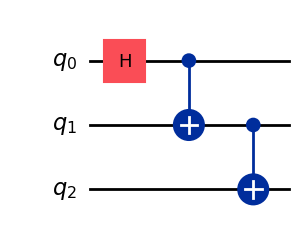

In [4]:
circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0,1)
circ.cx(1,2)
circ.draw("mpl")

In [5]:
grade_lab0_ex1(circ)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


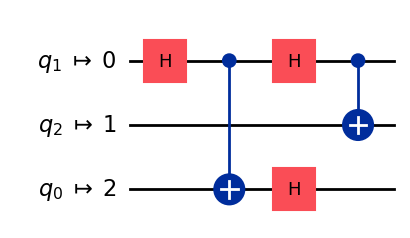

In [6]:
coupling_map = [[0,1],[0,2]]
from qiskit import transpile
qc_transpiled = transpile(circ, coupling_map=coupling_map)
qc_transpiled.draw("mpl")

In [7]:
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [9]:
circ.measure_all()
backend = AerSimulator()
sampler = Sampler(mode=backend)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([circ]))
results_sampler = job.result()

In [10]:
estimator = Estimator(mode=backend)

ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

pub = (circ, observables)
job = estimator.run(pubs=[pub])
results_estimator = job.result()

  Outcomes : {'111': 501, '000': 523}


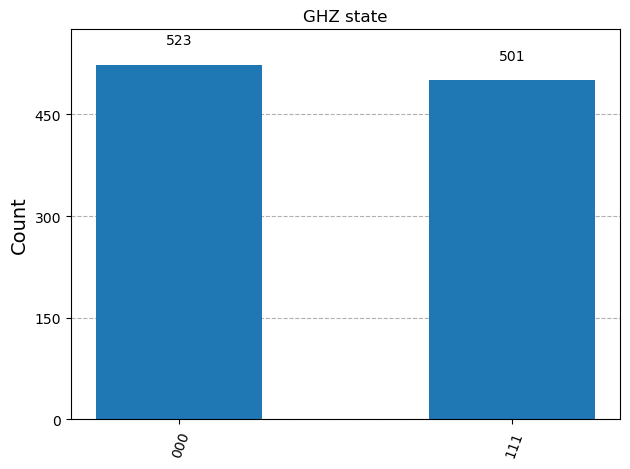

In [11]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(-0.0126953125)), ('ZZX', np.float64(-0.02392578125)), ('ZII', np.float64(-0.0263671875)), ('XXI', np.float64(0.02001953125)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


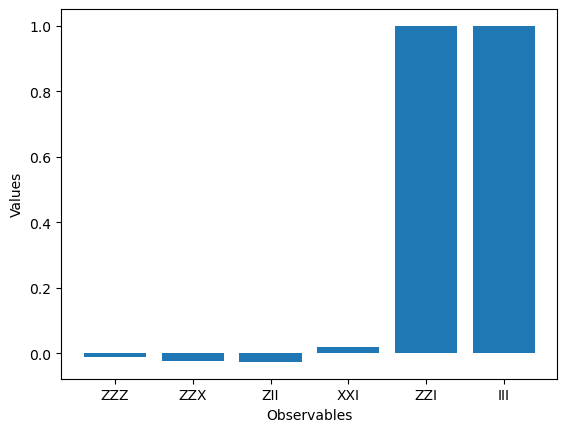

In [12]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [13]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 410 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
